# Music  Recommendation System 

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import time
from sklearn.model_selection import train_test_split
import joblib as jl
import Evaluation as Eval
import Recommenders as Rmd

# Load songs dataset and merge 

In [3]:
# Provided external source urls for the dataset 
# Mentioned User_id , Song_id, Listen_Count as a Songs_File 
# Loading and merging the dataset might take few mintues  

Songs_File = 'https://static.turi.com/datasets/millionsong/10000.txt'  
SongsMetadataFile  = 'https://static.turi.com/datasets/millionsong/song_data.csv'

Songs_DataFrame1 = pd.read_table(Songs_File,header=None)
Songs_DataFrame1.columns = ['user_id', 'song_id', 'listen_count']

#pandas.read function used to read the given data  
Songs_DataFrame2 =  pd.read_csv(SongsMetadataFile)

In [4]:
# To create input DataFrame , the above two DataFrames need to be combined . we user pandas.merge function to merge the DataFrames 
# We get million song dataset after merging the given input datasets 
Songs_DataFrame = pd.merge(Songs_DataFrame1, Songs_DataFrame2.drop_duplicates(['song_id']), on="song_id", how="left") 

## Length of the dataset

In [5]:
len(Songs_DataFrame)

2000000

# Explore data

Songs data exhibit the details of the song and count of a song user listened to . 

In [6]:
Songs_DataFrame.head()

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


## Create a subset of the dataset

In [7]:
Songs_DataFrame = Songs_DataFrame.head(10000)

In [8]:
# To form a merged column , title of the song and its perticular  artist name should be merged 
Songs_DataFrame['song'] = Songs_DataFrame['title'].map(str) + " - " + Songs_DataFrame['artist_name']

##  Most popular songs in the dataset

In [9]:
#groupby function makes items join together and developing each element displays as tuple, in a labelled group taking  1st element is the key .
#agg() is used to make the series for the given list , reset_index() is used to reset the index of the data frame.
Songs_Grouped = Songs_DataFrame.groupby(['song']).agg({'listen_count': 'count'}).reset_index()
Grouped_Songs_Total = Songs_Grouped['listen_count'].sum()

In [10]:
Songs_Grouped['percentage']  = Songs_Grouped['listen_count'].div(Grouped_Songs_Total)*100
# sorting algorithm used to make the series appear in ascending or desending order 
Songs_Grouped.sort_values(['listen_count', 'song'], ascending = [0,1])

,song,listen_count,percentage
3660,Sehr kosmisch - Harmonia,45,0.45
4678,Undo - Björk,32,0.32
5105,You're The One - Dwight Yoakam,32,0.32
1071,Dog Days Are Over (Radio Edit) - Florence + Th...,28,0.28
3655,Secrets - OneRepublic,28,0.28
...,...,...,...
5139,high fives - Four Tet,1,0.01
5140,in white rooms - Booka Shade,1,0.01
5143,paranoid android - Christopher O'Riley,1,0.01
5149,¿Lo Ves? [Piano Y Voz] - Alejandro Sanz,1,0.01


In [11]:
Popular_Songs = Songs_DataFrame.groupby('title')['listen_count'].sum().reset_index()
Top20_Popular_Songs = Songs_DataFrame.sort_values('listen_count',ascending = False).head(n = 20)

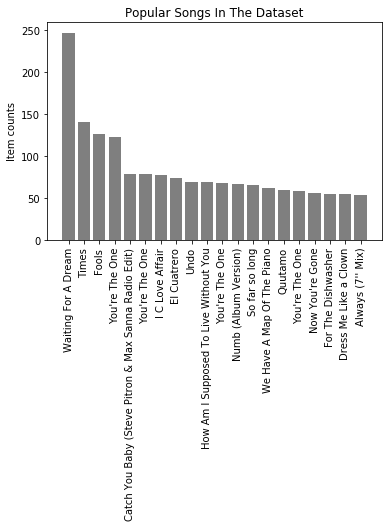

In [12]:
#import matplotlib.pyplot as plt

Songs_Object = list(Top20_Popular_Songs['title'])
y_pos = np.arange(len(Songs_Object))
Performence = list(Top20_Popular_Songs['listen_count'])

plt.bar(y_pos,Performence,facecolor = 'black',align = 'center',alpha = 0.5)
plt.xticks(y_pos,Songs_Object,rotation = 'vertical')
plt.ylabel('Item counts')
plt.title('Popular Songs In The Dataset')

plt.show()

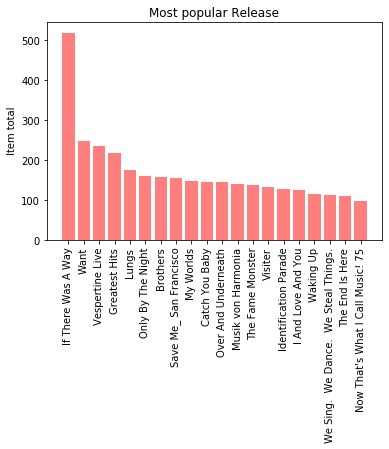

In [13]:
Most_Popular_Release = Songs_DataFrame[['release','listen_count']].groupby('release').sum().reset_index()
Top20_Popular_Release = Most_Popular_Release.sort_values('listen_count', ascending=False).head(n=20)

Dataset_Objects = (list(Top20_Popular_Release['release']))
y_pos = np.arange(len(Dataset_Objects))
Performance = list(Top20_Popular_Release['listen_count'])
 
plt.bar(y_pos, Performance, facecolor = 'red', align='center', alpha=0.5)
plt.xticks(y_pos, Dataset_Objects, rotation='vertical')
plt.ylabel(' Item total')
plt.title('Most popular Release')
 
plt.show()

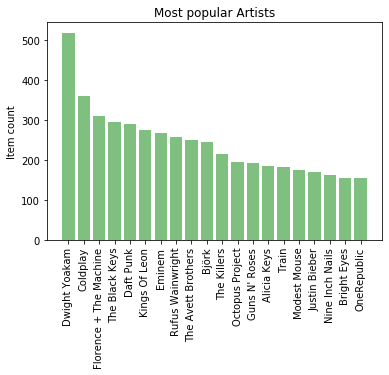

In [14]:
Most_Popular_Artist = Songs_DataFrame[['artist_name','listen_count']].groupby('artist_name').sum().reset_index()
Top20_Popular_Artist = Most_Popular_Artist.sort_values('listen_count', ascending=False).head(n=20)

Dataset_Objects = (list(Top20_Popular_Artist['artist_name']))
y_pos = np.arange(len(Dataset_Objects))
Performance = list(Top20_Popular_Artist['listen_count'])
 
plt.bar(y_pos, Performance,facecolor = 'green', align='center', alpha=0.5)
plt.xticks(y_pos, Dataset_Objects, rotation='vertical')
plt.ylabel('Item count')
plt.title('Most popular Artists')
 
plt.show()

In [15]:
Song_Count_Distibution = Songs_DataFrame.groupby('user_id')['title'].count().reset_index().sort_values(
by = 'title',ascending = False)
Song_Count_Distibution.title.describe()

count    365.000000
mean      27.397260
std       36.707314
min        1.000000
25%        9.000000
50%       16.000000
75%       30.000000
max      401.000000
Name: title, dtype: float64

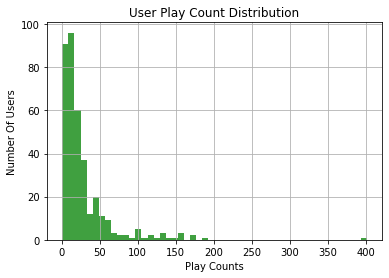

In [16]:
Value = Song_Count_Distibution.title
plt.hist(Value,50,facecolor = 'Green',alpha = 0.75)
plt.xlabel('Play Counts')
plt.ylabel('Number Of Users')
plt.title('User Play Count Distribution') # Histogram 
plt.grid(True)

plt.show()


## Unique users and Unique Songs in the dataset

In [17]:
Unique_Users = Songs_DataFrame['user_id'].unique()
len(Unique_Users)

365

In [18]:
Unique_Songs = Songs_DataFrame['song'].unique()
len(Unique_Songs)

5151

# Generate a Song Recommender

In [19]:
# train and test the dataset 
#test size is given as 0.20 which means 20% of the data used for testing and remaining 80% is used for training the data.
#random_state is used to split the data into train and test 
Music_Train_Data, Music_Test_Data = train_test_split(Songs_DataFrame, test_size = 0.20, random_state=0)

In [20]:
print(Music_Train_Data.head(5))

                                       user_id             song_id  \
7389  94d5bdc37683950e90c56c9b32721edb5d347600  SOXNZOW12AB017F756   
9275  1012ecfd277b96487ed8357d02fa8326b13696a5  SOXHYVQ12AB0187949   
2995  15415fa2745b344bce958967c346f2a89f792f63  SOOSZAZ12A6D4FADF8   
5316  ffadf9297a99945c0513cd87939d91d8b602936b  SOWDJEJ12A8C1339FE   
356   5a905f000fc1ff3df7ca807d57edb608863db05d  SOAMPRJ12A8AE45F38   

      listen_count                 title  \
7389             2      Half Of My Heart   
9275             1  The Beautiful People   
2995             1     Sanctify Yourself   
5316             4     Heart Cooks Brain   
356             20                 Rorol   

                                                release      artist_name  \
7389                                     Battle Studies       John Mayer   
9275             Antichrist Superstar (Ecopac Explicit)   Marilyn Manson   
2995                             Glittering Prize 81/92     Simple Minds   
5316  Ever

In [21]:
Music_Test_Data.head()

,user_id,song_id,listen_count,title,release,artist_name,year,song
9394,97e48f0f188e04dcdb0f8e20a29dacb881d80c9e,SOLCAXX12B0B8079A5,1,Mister Jung Stuffed,Rabbit Habits,Man Man,2008,Mister Jung Stuffed - Man Man
898,a820d2d4f16bbd53be9e41e0417dfb234bfdfba8,SOHMTUC12A58A799D4,2,Ort,Cunning Stunts,Cows,1992,Ort - Cows
2398,01655ae6bc52e29c9cd100a7dde4e9eeae5e4031,SOEUTXF12A6D4FC6F8,2,Suena tu guitarra,Muriendo de Amor,Fernando Soto,0,Suena tu guitarra - Fernando Soto
5906,806ccae96c8ecb1c198482aff785ccd6bbe17143,SOIBSSJ12A8151E066,1,Let Me Be Myself,3 Doors Down,3 Doors Down,2008,Let Me Be Myself - 3 Doors Down
2343,8cbb5066924ec788e3fea9a4aae59586f46f38fa,SOPPROJ12AB0184E18,1,Pursuit Of Happiness (nightmare),Pursuit Of Happiness,Kid Cudi / MGMT / Ratatat,2010,Pursuit Of Happiness (nightmare) - Kid Cudi / ...


In [22]:
Music_Train_Data.info()
print("\n")
Songs_DataFrame.info()
print("\n")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 7389 to 2732
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       8000 non-null   object
 1   song_id       8000 non-null   object
 2   listen_count  8000 non-null   int64 
 3   title         8000 non-null   object
 4   release       8000 non-null   object
 5   artist_name   8000 non-null   object
 6   year          8000 non-null   int64 
 7   song          8000 non-null   object
dtypes: int64(2), object(6)
memory usage: 562.5+ KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       10000 non-null  object
 1   song_id       10000 non-null  object
 2   listen_count  10000 non-null  int64 
 3   title         10000 non-null  object
 4   release       10000 non-null  object
 5   artist_name

# Popularity Based Recommender 

Popularity based recommender , recommend the songs which are liked by most number of users. Popularity based recommenders has a bad approch and has a major drawback because, no depth personlization involved in this approch. 
Few methods are followed by the new portals and they work impressively because of the following reasons :
    1.There is a splitting by section , so indiviual can follow the section of his/her interest.
    2.At a time there are only a few trending songs and there is a high chance that a user wants to listen the songs which is listened by most of the users. 

In [23]:
#Recommenders.popularity_recommender_py

In [24]:
# Creating an instance of popularity based recommender class
PopularityModel = Rmd.popularity_recommender_py()
PopularityModel.create(Music_Train_Data, 'user_id', 'song')

In [25]:
# To make various predictions we use popularity model 
User_ID = Unique_Users[9]
PopularityModel.recommend(User_ID)

,user_id,song,score,Rank
3194,b64cdd1a0bd907e5e00b39e345194768e330d652,Sehr kosmisch - Harmonia,37,1.0
4083,b64cdd1a0bd907e5e00b39e345194768e330d652,Undo - Björk,27,2.0
931,b64cdd1a0bd907e5e00b39e345194768e330d652,Dog Days Are Over (Radio Edit) - Florence + Th...,24,3.0
4443,b64cdd1a0bd907e5e00b39e345194768e330d652,You're The One - Dwight Yoakam,24,4.0
3034,b64cdd1a0bd907e5e00b39e345194768e330d652,Revelry - Kings Of Leon,21,5.0
3189,b64cdd1a0bd907e5e00b39e345194768e330d652,Secrets - OneRepublic,21,6.0
4112,b64cdd1a0bd907e5e00b39e345194768e330d652,Use Somebody - Kings Of Leon,21,7.0
1207,b64cdd1a0bd907e5e00b39e345194768e330d652,Fireflies - Charttraxx Karaoke,20,8.0
1577,b64cdd1a0bd907e5e00b39e345194768e330d652,Hey_ Soul Sister - Train,19,9.0
1626,b64cdd1a0bd907e5e00b39e345194768e330d652,Horn Concerto No. 4 in E flat K495: II. Romanc...,19,10.0


In [26]:
# To make various predictions we use popularity model 
User_ID = Unique_Users[20]
PopularityModel.recommend(User_ID)

,user_id,song,score,Rank
3194,0afaa5d9d04bf85af720fe8cc566a41ca3e41c97,Sehr kosmisch - Harmonia,37,1.0
4083,0afaa5d9d04bf85af720fe8cc566a41ca3e41c97,Undo - Björk,27,2.0
931,0afaa5d9d04bf85af720fe8cc566a41ca3e41c97,Dog Days Are Over (Radio Edit) - Florence + Th...,24,3.0
4443,0afaa5d9d04bf85af720fe8cc566a41ca3e41c97,You're The One - Dwight Yoakam,24,4.0
3034,0afaa5d9d04bf85af720fe8cc566a41ca3e41c97,Revelry - Kings Of Leon,21,5.0
3189,0afaa5d9d04bf85af720fe8cc566a41ca3e41c97,Secrets - OneRepublic,21,6.0
4112,0afaa5d9d04bf85af720fe8cc566a41ca3e41c97,Use Somebody - Kings Of Leon,21,7.0
1207,0afaa5d9d04bf85af720fe8cc566a41ca3e41c97,Fireflies - Charttraxx Karaoke,20,8.0
1577,0afaa5d9d04bf85af720fe8cc566a41ca3e41c97,Hey_ Soul Sister - Train,19,9.0
1626,0afaa5d9d04bf85af720fe8cc566a41ca3e41c97,Horn Concerto No. 4 in E flat K495: II. Romanc...,19,10.0


In [25]:
Songs_ID = Unique_Songs[8]
PopularityModel.recommend(Songs_ID)

,user_id,song,score,Rank
3194,Sehr kosmisch - Harmonia,Sehr kosmisch - Harmonia,37,1.0
4083,Sehr kosmisch - Harmonia,Undo - Björk,27,2.0
931,Sehr kosmisch - Harmonia,Dog Days Are Over (Radio Edit) - Florence + Th...,24,3.0
4443,Sehr kosmisch - Harmonia,You're The One - Dwight Yoakam,24,4.0
3034,Sehr kosmisch - Harmonia,Revelry - Kings Of Leon,21,5.0
3189,Sehr kosmisch - Harmonia,Secrets - OneRepublic,21,6.0
4112,Sehr kosmisch - Harmonia,Use Somebody - Kings Of Leon,21,7.0
1207,Sehr kosmisch - Harmonia,Fireflies - Charttraxx Karaoke,20,8.0
1577,Sehr kosmisch - Harmonia,Hey_ Soul Sister - Train,19,9.0
1626,Sehr kosmisch - Harmonia,Horn Concerto No. 4 in E flat K495: II. Romanc...,19,10.0


# Create a song recommender with personalization
# Collaborative Filtering Model

The different item similarities in the dataset are measured . Final similarity data is used to predict . Now create an item similarity based collaborative filtering model which makes each individual to get personalized recommendations.
Recommenders.item_similarity_recommender.py class is used for Item similarity based personlized generator - can be used as a black box 

In [26]:
# Creating an instance of popularity based recommender class
ItemSimilarityModel = Rmd.item_similarity_recommender_py()
ItemSimilarityModel.create(Music_Train_Data, 'user_id', 'song')

# Personalized Model to generate song recommendations

In [27]:
#personalized Model  for the User Id to make recommendations
#Print the songs to the user in trained data
User_ID = Unique_Users [9]
User_Items = ItemSimilarityModel.get_user_items(User_ID)
#
print("***************************************************")
print("Training data songs for the user userid: %s:" % User_ID)
print("***************************************************")

for user_item in User_Items:
    print(user_item)

print("***************************************************")
print("Recommendation process going on:")
print("***************************************************")

#Recommend songs for the user using personalized model
ItemSimilarityModel.recommend(User_ID)

NameError: name 'ItemSimilarityModel' is not defined

In [96]:
User_ID = Unique_Users [20]
User_Items = ItemSimilarityModel.get_user_items(User_ID)
#
print("***************************************************")
print("Training data songs for the user userid: %s:" % User_ID)
print("***************************************************")

for user_item in User_Items:
    print(user_item)

print("***************************************************")
print("Recommendation process going on:")
print("***************************************************")

#Recommend songs for the user using personalized model
ItemSimilarityModel.recommend(User_ID)

***************************************************
Training data songs for the user userid: 0afaa5d9d04bf85af720fe8cc566a41ca3e41c97:
***************************************************
Across The Universe - Jim Sturgess
Supermassive Black Hole (Twilight Soundtrack Version) - Muse
Secrets - OneRepublic
Use Somebody - Kings Of Leon
Hooked On A Feeling - Blue Swede
Undo - Björk
Revelry - Kings Of Leon
Lying From You (Album Version) - Linkin Park
All My Loving - Jim Sturgess
Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile) - Barry Tuckwell/Academy of St Martin-in-the-Fields/Sir Neville Marriner
Sehr kosmisch - Harmonia
Revolution - Jim Sturgess
NAISEN KANSSA - Sami Saari
Rooftops - Lostprophets
Mardy Bum - Arctic Monkeys
Something - Jim Sturgess
***************************************************
Recommendation process going on:
***************************************************
No. of unique songs for the user: 16
no. of unique songs in the training set: 4483
Non zer

,user_id,song,score,rank
0,0afaa5d9d04bf85af720fe8cc566a41ca3e41c97,I've Just Seen A Face - Jim Sturgess,0.062500,1
1,0afaa5d9d04bf85af720fe8cc566a41ca3e41c97,All You Need Is Love - Jim Sturgess / Dana Fuchs,0.062500,2
2,0afaa5d9d04bf85af720fe8cc566a41ca3e41c97,Dog Days Are Over (Radio Edit) - Florence + Th...,0.059948,3
3,0afaa5d9d04bf85af720fe8cc566a41ca3e41c97,You're The One - Dwight Yoakam,0.059716,4
4,0afaa5d9d04bf85af720fe8cc566a41ca3e41c97,Alejandro - Lady GaGa,0.055281,5
5,0afaa5d9d04bf85af720fe8cc566a41ca3e41c97,Just Dance - Lady GaGa / Colby O'Donis,0.054959,6
6,0afaa5d9d04bf85af720fe8cc566a41ca3e41c97,Lucky (Album Version) - Jason Mraz & Colbie Ca...,0.053376,7
7,0afaa5d9d04bf85af720fe8cc566a41ca3e41c97,If I Could - Jack Johnson,0.052083,8
8,0afaa5d9d04bf85af720fe8cc566a41ca3e41c97,Situations - Jack Johnson,0.052083,9
9,0afaa5d9d04bf85af720fe8cc566a41ca3e41c97,Crying Shame - Jack Johnson,0.052083,10


## We can use the personalized recommender model to get the similar songs 

In [28]:
song =  'Love Story - Taylor Swift'
ItemSimilarityModel.get_similar_items([song])

no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :351


,user_id,song,score,rank
0,,Heartbreak Warfare - John Mayer,0.357143,1
1,,Lucky (Album Version) - Jason Mraz & Colbie Ca...,0.350000,2
2,,Here Without You - 3 Doors Down,0.307692,3
3,,Bleed It Out [Live At Milton Keynes] - Linkin ...,0.294118,4
4,,Monster - Lady GaGa,0.285714,5
5,,Clocks - Coldplay,0.263158,6
6,,Alejandro - Lady GaGa,0.263158,7
7,,Time To Pretend - MGMT,0.250000,8
8,,Hey_ Soul Sister - Train,0.250000,9
9,,The Only Exception (Album Version) - Paramore,0.250000,10


# Compare the Popularity Model and the Personalized Model using Precision and Recall Curves

Evaluation.precision_recall_calculator class is used to calculate the precision and recall 

In [29]:
# By using the precision_recall_calculator we get the calculated evaluation measures 

Start = time.time()

#users percentage is given to use for precision recall calculatiion
User_Sample_Data = 0.05
PrecisionRecall = Eval.precision_recall_calculator(Music_Test_Data, Music_Train_Data, PopularityModel, ItemSimilarityModel )
# calculating the values using call method 

(PopularityModel_avg_precision_list, PopularityModel_avg_recall_list, ItemSimilarityModel_avg_precision_list, ItemSimilarityModel_avg_recall_list) = PrecisionRecall.calculate_measures(User_Sample_Data)

End = time.time()
print(End - Start)

Length of user_test_and_training:319
Length of user sample:15
Getting recommendations for user:4192e443e37ffa08f1cc02b10b42b4a178a09004
No. of unique songs for the user: 17
no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :4776
Getting recommendations for user:9fbc0cc4fe6191cabdddf41124bd507dca08ceb6
No. of unique songs for the user: 25
no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :11023
Getting recommendations for user:9b887e10a4711486085c4fae2d2599fc0d2c484d
No. of unique songs for the user: 128
no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :25830
Getting recommendations for user:b11e6a84c54160e61efdb9cb5a572b419aa33ae9
No. of unique songs for the user: 8
no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :466
Getting recommendations for user:c5d42aa00afa6889de703c49f40ecb26b1c401c4
No. of unique songs for the user: 36
no. of unique songs in

# Plot Precision Recall Curve 

In [92]:
import pylab

def Plot_Precision_Recall(m1_precision_list, m1_recall_list, m1_label, m2_precision_list, m2_recall_list, m2_label):
    pylab.clf()    
    pylab.plot(m1_recall_list, m1_precision_list, label=m1_label)
    pylab.plot(m2_recall_list, m2_precision_list, label=m2_label)
    pylab.xlabel('Recall')
    pylab.ylabel('Precision')
    pylab.ylim([0.0, 0.20])
    pylab.xlim([0.0, 0.20])
    pylab.title('Precision Recall curve')
  
    pylab.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
    pylab.show()


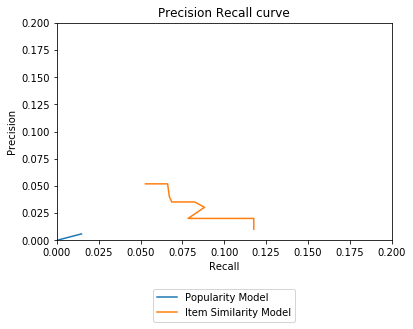

In [93]:
Plot_Precision_Recall(PopularityModel_avg_precision_list, PopularityModel_avg_recall_list, "Popularity Model",
                      ItemSimilarityModel_avg_precision_list, ItemSimilarityModel_avg_recall_list, "Item Similarity Model")

# Create Precision Recall Curve using a large Data subset 

In [32]:
#Read the  files 
PopularityModel_avg_precision_list = jl.load('pm_avg_precision_list_3.pkl')
PopularityModel_avg_recall_list = jl.load('pm_avg_recall_list_3.pkl')
ItemSimilarityModel_avg_precision_list = jl.load('ism_avg_precision_list_3.pkl')
ItemSimilarityModel_avg_recall_list = jl.load('ism_avg_recall_list_3.pkl')

Plotting Precision Recall Curves.
Plotting precision recall curves with (100,000 rows) (User_Sample = 0.005).


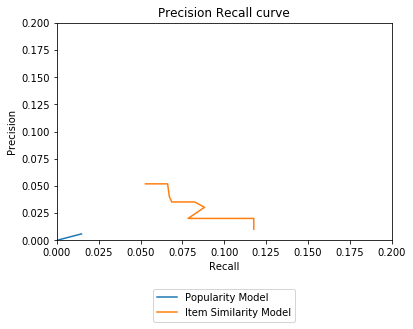

In [33]:
print("Plotting Precision Recall Curves.")
print("Plotting precision recall curves with (100,000 rows) (User_Sample = 0.005).")

Plot_Precision_Recall(PopularityModel_avg_precision_list, PopularityModel_avg_recall_list, "Popularity Model",
                     ItemSimilarityModel_avg_precision_list, ItemSimilarityModel_avg_recall_list, "Item Similarity Model")

# Recommendations with Matix- Factorization Method 

In [34]:
import math
import sparsesvd 
from scipy.sparse.linalg import *
from scipy.sparse import csc_matrix, coo_matrix
import csv
import numpy as np

In [35]:
# Calculating the total number of songs listened by the current user and the number of users listened resulting its score 

Merged_Dataset = Songs_DataFrame
Data_User_codes = Merged_Dataset.user_id.drop_duplicates().reset_index()
Data_Song_codes = Merged_Dataset.song_id.drop_duplicates().reset_index() #changed user_id to Merged_Dataset.user_id.drop_duplicates() to Merged_Dataset.song_id.drop_duplicates()
Data_User_codes.rename(columns = {'index':'user_index'},inplace = True)
Data_Song_codes.rename(columns = {'index':'song_index'},inplace=True)
Data_User_codes['song_index_value'] = list(Data_User_codes.index)
Data_Song_codes['user_index_value'] = list(Data_Song_codes.index)

In [36]:
Merged_Dataset = pd.merge(Merged_Dataset,Data_User_codes,how = 'left')
Merged_Dataset = pd.merge(Merged_Dataset,Data_Song_codes,how =  'left')

In [37]:
Merged_Dataset.head()

,user_id,song_id,listen_count,title,release,artist_name,year,song,user_index,song_index_value,song_index,user_index_value
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0,The Cove - Jack Johnson,0,0,0,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976,Entre Dos Aguas - Paco De Lucia,0,0,1,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007,Stronger - Kanye West,0,0,2,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005,Constellations - Jack Johnson,0,0,3,3
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,Learn To Fly - Foo Fighters,0,0,4,4


# Create a Matrix of Users, Songs and Score values

In [38]:
Matrix_User = Merged_Dataset[['user_index_value','song_index_value','listen_count']]
Data_array = Matrix_User.listen_count.values
Row_array = Matrix_User.user_index_value.values
Colunm_array = Matrix_User.song_index_value.values

Data_Sparse = coo_matrix((Data_array,(Row_array,Colunm_array)),dtype=float)

In [39]:
Data_Sparse

<5175x365 sparse matrix of type '<class 'numpy.float64'>'
	with 10000 stored elements in COOrdinate format>

In [40]:
Data_Sparse.shape

(5175, 365)

In [41]:
Data_Song_codes.head()

,song_index,song_id,user_index_value
0,0,SOAKIMP12A8C130995,0
1,1,SOBBMDR12A8C13253B,1
2,2,SOBXHDL12A81C204C0,2
3,3,SOBYHAJ12A6701BF1D,3
4,4,SODACBL12A8C13C273,4


In [42]:
#Data_Song_codes[Data_Song_codes.user_id == '403b3b867fc71dfdcc12652f30e88bdc7ccd9aa4']
#Why are we using Data_Song_codes.user_id since we already did a Merged_Dataset.user_id which is a more comprehensive dataset
Merged_Dataset[Merged_Dataset.user_id == '403b3b867fc71dfdcc12652f30e88bdc7ccd9aa4']

,user_id,song_id,listen_count,title,release,artist_name,year,song,user_index,song_index_value,song_index,user_index_value
1043,403b3b867fc71dfdcc12652f30e88bdc7ccd9aa4,SOAXAPU12A67020EF9,5,"Dirty Movies"" (Album Version)",Fair Warning,Van Halen,1981,"Dirty Movies"" (Album Version) - Van Halen",1043,22,1043,932
1044,403b3b867fc71dfdcc12652f30e88bdc7ccd9aa4,SOCXBTX12A8C132F5A,1,Shadow Stabbing,Comfort Eagle,Cake,2001,Shadow Stabbing - Cake,1043,22,1044,933
1045,403b3b867fc71dfdcc12652f30e88bdc7ccd9aa4,SOEEYNQ12A8C132864,2,Comfort Eagle,Comfort Eagle,Cake,2001,Comfort Eagle - Cake,1043,22,1045,934
1046,403b3b867fc71dfdcc12652f30e88bdc7ccd9aa4,SOEGOAB12A8C13BAE4,1,Never There,Prolonging the Magic,Cake,1998,Never There - Cake,1043,22,1046,935
1047,403b3b867fc71dfdcc12652f30e88bdc7ccd9aa4,SOETHQM12A8C1366A9,1,Short Skirt/Long Jacket,Comfort Eagle,Cake,2001,Short Skirt/Long Jacket - Cake,1043,22,1047,936
1048,403b3b867fc71dfdcc12652f30e88bdc7ccd9aa4,SOIJWTX12AB017BC6C,5,An Unsavoury Urge,Lumina,The Rogue Element,0,An Unsavoury Urge - The Rogue Element,1043,22,1048,937
1049,403b3b867fc71dfdcc12652f30e88bdc7ccd9aa4,SOLKQFY12AF72A4DE3,1,Overture/And All That Jazz,Chicago - Music From The Miramax Motion Picture,Catherine Zeta-Jones;Renée Zellweger;Taye Diggs,0,Overture/And All That Jazz - Catherine Zeta-Jo...,1043,22,1049,938
1050,403b3b867fc71dfdcc12652f30e88bdc7ccd9aa4,SONZMEO12AF72AA717,1,Commissioning A Symphony In C,Comfort Eagle,Cake,2001,Commissioning A Symphony In C - Cake,1043,22,1050,939
1051,403b3b867fc71dfdcc12652f30e88bdc7ccd9aa4,SOUELOC12AB0182DD1,2,Stickshifts And Safetybelts,Fashion Nugget,Cake,1996,Stickshifts And Safetybelts - Cake,1043,22,1051,940
1052,403b3b867fc71dfdcc12652f30e88bdc7ccd9aa4,SOUXBNY12A8C13BADB,2,Mexico,Prolonging the Magic,Cake,1998,Mexico - Cake,1043,22,1052,941


In [43]:
def Compute_SVD(urm,k):
    U,s,Vt = svds(urm,k)
    
    dimention = (len(s),len(s))
    S = np.zeros(dimention,dtype=np.float32)
    for i in range(0,len(s)):
        S[i,i] = math.sqrt(s[i])
    
    U = csc_matrix(U,dtype=np.float32)
    S = csc_matrix(S,dtype=np.float32)
    Vt = csc_matrix(Vt,dtype=np.float32)
    
    return U,S,Vt

def Compute_Estimate_Matrix(urm,U,S,Vt,Utest,K,test):
    right_Item = S*Vt
    max_recommendation = 50
    Estimated_Matrix = np.zeros(shape = (MAX_UID,MAX_PID),dtype=np.float16)
    Recommend_Matrix = np.zeros(shape=(MAX_UID,max_recommendation),dtype=np.float16)
    for User_Test in Utest:
        prob = U[User_Test,:]*right_Item
        Estimated_Matrix[User_Test,:] = prob.todense()
        Recommend_Matrix[User_Test,:] = (-Estimated_Matrix[User_Test,:]).argsort()[:max_recommendation]
    return Recommend_Matrix

In [44]:
k = 50
urm = Data_Sparse

MAX_UID = urm.shape[0]
MAX_PID = urm.shape[1]

U,S,Vt = Compute_SVD(urm,k)

In [45]:
Utest = [8]

Utest_recommended_items = Compute_Estimate_Matrix(urm,U,S,Vt,Utest,k,True)

In [46]:
for user in Utest:
    print("Recommendation for user with user id {}". format(user))
    Rank_Value = 1
    for i in Utest_recommended_items[user,0:10]:
        Dataset_Song_Details = Merged_Dataset[Merged_Dataset.song_index_value == i].drop_duplicates('song_index_value')[['title','artist_name']]
        print("Number  {} Recommended song is {} ...BY... {}".format(Rank_Value, list(Dataset_Song_Details['title'])[0],list(Dataset_Song_Details['artist_name'])[0]))
        Rank_Value+=1

Recommendation for user with user id 8
Number  1 Recommended song is Halo ...BY... Beyoncé
Number  2 Recommended song is Halo ...BY... The Pussycat Dolls
Number  3 Recommended song is Full Circle ...BY... Miley Cyrus
Number  4 Recommended song is Bleed It Out [Live At Milton Keynes] ...BY... Linkin Park
Number  5 Recommended song is Halo ...BY... Beyoncé
Number  6 Recommended song is Halo ...BY... Beyoncé
Number  7 Recommended song is Rome Wasn't Built In A Day ...BY... Morcheeba
Number  8 Recommended song is Good Love Is On The Way ...BY... John Mayer
Number  9 Recommended song is Undo ...BY... Björk
Number  10 Recommended song is Uprising ...BY... Muse


#  K-Means Clustering

In [47]:
from sklearn.cluster import KMeans
import pickle
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns

In [58]:
#Songs_DataFrame_1=Songs_DataFrame
Songs_DataFrame['cluster']=0
#Songs_DataFrame.head()
Merged_Dataset.head()

,user_id,song_id,listen_count,title,release,artist_name,year,song,user_index,song_index_value,song_index,user_index_value
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0,The Cove - Jack Johnson,0,0,0,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976,Entre Dos Aguas - Paco De Lucia,0,0,1,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007,Stronger - Kanye West,0,0,2,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005,Constellations - Jack Johnson,0,0,3,3
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,Learn To Fly - Foo Fighters,0,0,4,4


In [59]:
#Songs_DataFrame.describe()
Merged_Dataset.describe()

,listen_count,year,user_index,song_index_value,song_index,user_index_value
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.991100,1662.383300,4961.778200,166.382900,3038.421300,2020.856400
std,5.915177,751.095133,2899.885406,108.019251,2652.341984,1484.913381
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1988.000000,2450.000000,73.000000,816.750000,764.750000
50%,1.000000,2003.000000,4904.000000,152.000000,2257.000000,1742.500000
75%,3.000000,2007.000000,7461.000000,261.000000,4852.250000,3187.250000
max,247.000000,2010.000000,9995.000000,364.000000,9993.000000,5174.000000


In [60]:
#Songs_DataFrame.shape
Merged_Dataset.shape

(10000, 12)

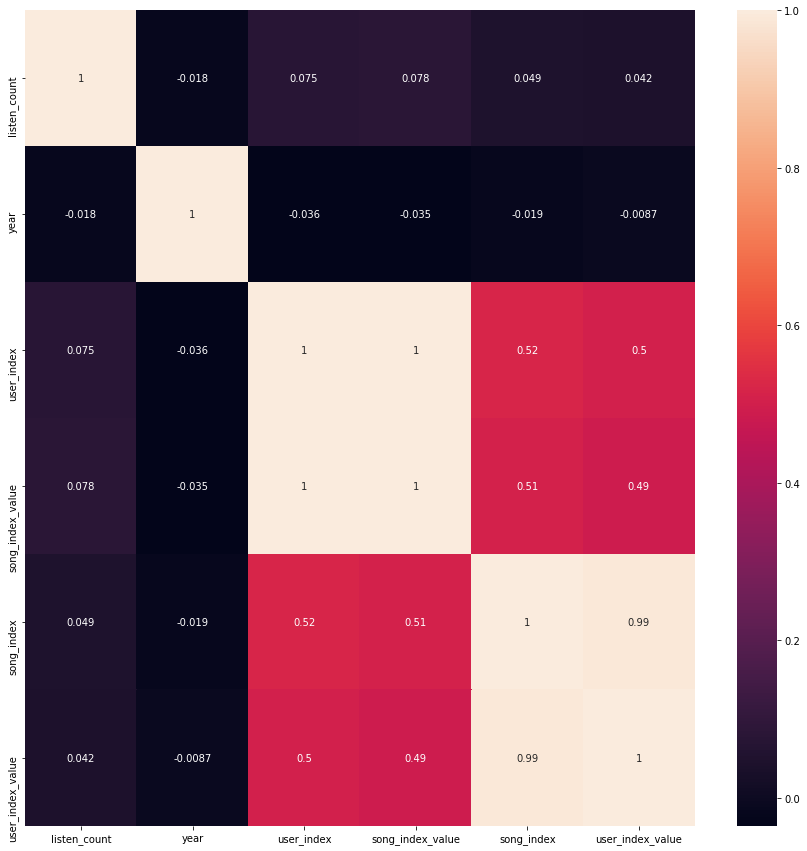

In [61]:
plt.figure(figsize=(15,15))     
#sns.heatmap(Songs_DataFrame.corr(),annot=True)
sns.heatmap(Merged_Dataset.corr(),annot=True)

<Figure size 360x360 with 0 Axes>

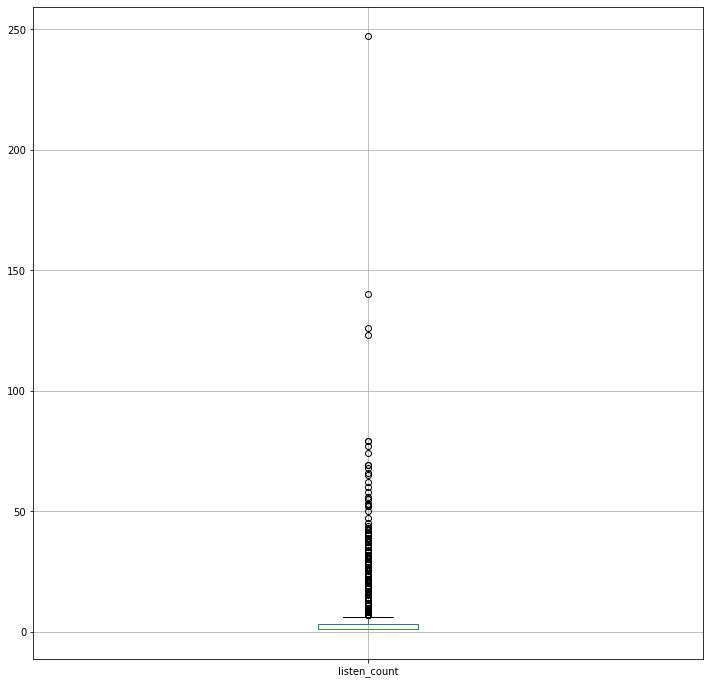

<Figure size 360x360 with 0 Axes>

In [62]:
plt.figure(figsize=(12,12))     
#Songs_DataFrame.boxplot(column='listen_count')
Merged_Dataset.boxplot(column='listen_count')
plt.figure(figsize=(5,5))     



In [63]:
#Data_clmns=['listen_count','year']
#X = stats.zscore(Songs_DataFrame[Data_clmns])
#Data_clmns=['listen_count','user_index']
#X = stats.zscore(Merged_Dataset[Data_clmns])

In [64]:
#kmeans = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',random_state=None, tol=0.0001, verbose=0)

[[2.67297048e+00 1.01887039e+03]
 [3.33248988e+00 6.98446154e+03]
 [3.88285145e+00 8.96781306e+03]
 [2.47989822e+00 3.11503359e+03]
 [2.58302387e+00 5.03824987e+03]]


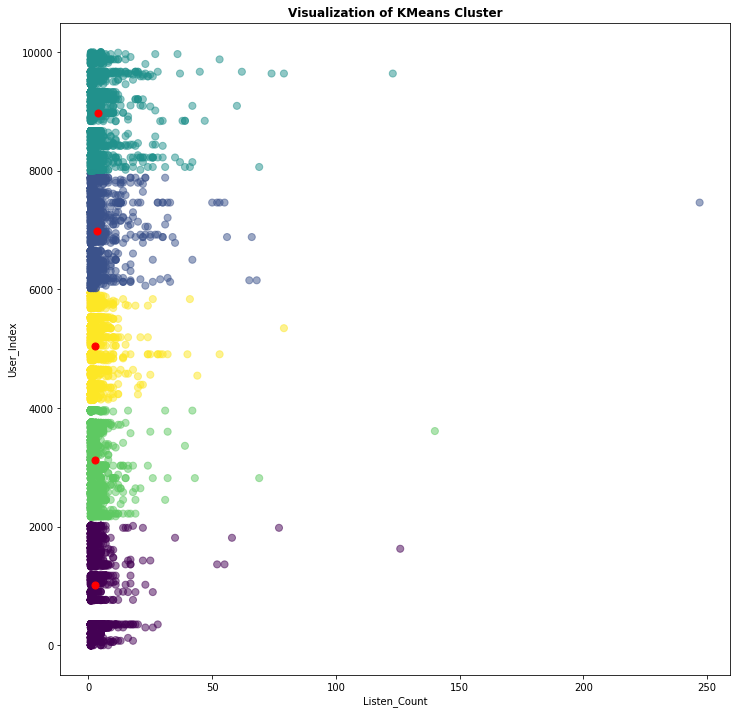

In [65]:
df = pd.DataFrame(Merged_Dataset,columns=['listen_count','user_index'])
#kmeans = KMeans(n_clusters=5).fit(df)
kmeans = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',random_state=None, tol=0.0001, verbose=0).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.figure(figsize=(12,12))
plt.scatter(df['listen_count'], df['user_index'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.xlabel('Listen_Count')
plt.ylabel('User_Index')
plt.title('Visualization of KMeans Cluster', fontweight='bold')
plt.show()

In [66]:
#prediction = kmeans.predict(df)
#print(prediction)
#Merged_Dataset[Merged_Dataset.song_index==8].song

In [67]:
Grid=Songs_DataFrame.groupby('cluster')   ## Grid Structure GK-means 
Grid.first()

,user_id,song_id,listen_count,title,release,artist_name,year,song
cluster,,,,,,,,
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0,The Cove - Jack Johnson


In [68]:
Grid=Songs_DataFrame[Songs_DataFrame.cluster==5]  ##grid structure and spatial index with k-means algorithm.
List=list(Songs_DataFrame.title)[2:12:1]
print(List)

['Stronger', 'Constellations', 'Learn To Fly', "Apuesta Por El Rock 'N' Roll", 'Paper Gangsta', 'Stacked Actors', 'Sehr kosmisch', "Heaven's gonna burn your eyes", 'Let It Be Sung', "I'll Be Missing You (Featuring Faith Evans & 112)(Album Version)"]


# Exploring Deep Learning on Genre Data

In [69]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file 
import tensorflow as tf
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
# importing sklearn required libraries 
from sklearn.dummy import DummyClassifier #Classifiles the given data with simple rules 
from sklearn.tree import DecisionTreeClassifier # supervised learning algorithm 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold  
#LinearDiscriminantAnalaysis  will work as a classifier and neural network will perform the classification part 
#results will be compared
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.neighbors import KNeighborsClassifier #KNN ML-algorithm (non-parametric )
# OneHot Encoder used used for precisions , LabelEncoder - encodes the numeric values 0 and n-1, scale- part of preprocessing "Transformer"
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, scale 

In [71]:
from matplotlib import cm #color maps 
from pandas.plotting import scatter_matrix # used to visualize the relationship between combinations of variables and allows many relationships to be explored in one chart 
from mpl_toolkits.axes_grid1 import make_axes_locatable # axes divider module 

In [72]:
New_Music_Data = pd.read_csv(r'Data1.csv')

In [73]:
New_Music_Data.head()

,Database,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,genre
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783624,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


In [74]:
Data_File = list(New_Music_Data.columns)
Data_File.remove('Database')
Data_File.remove('genre')
print(Data_File)

LabeledGroups = New_Music_Data.groupby('genre')
labels_data = list(New_Music_Data['genre'].unique())

# Group class labels by median value
for Data in Data_File:
    Data_groups = LabeledGroups[Data]
    Data_med_by_group = [(group[0], group[1].median()) for group in list(Data_groups)]
    Data_med_by_group = sorted(Data_med_by_group, key=lambda x: x[1])
    Data_labels_ordered_by_median, ordered_medians = zip(*Data_med_by_group)
    #We standardize for the theory of our analysis

['tempo', 'beats', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20']


# The above plots in this approch says that the division of data dint resemble a gaussian for most of the classes. However, we can implement with data standardize and use this for assumption of our analysis.

In [75]:
# Data Standardization 
#This is used for the process of rescaling one or more attributes 
#helps to bring the data into a regular format that authorize the collaborative research, large scale anaysis, methodologies

Music_DataFile_df = New_Music_Data[Data_File]
print(Music_DataFile_df.head(4))
Music_Datafile_nrm_df = pd.DataFrame(scale(Music_DataFile_df)) # 3-element of tuples
print(Music_Datafile_nrm_df.head(3))

        tempo  beats  chroma_stft      rmse  spectral_centroid  \
0  103.359375     50     0.380260  0.248262        2116.942959   
1   95.703125     44     0.306451  0.113475        1156.070496   
2  151.999081     75     0.253487  0.151571        1331.073970   
3  184.570312     91     0.269320  0.119072        1361.045467   

   spectral_bandwidth      rolloff  zero_crossing_rate       mfcc1  \
0         1956.611056  4196.107960            0.127272  -26.929785   
1         1497.668176  2170.053545            0.058613 -233.860772   
2         1973.643437  2900.174130            0.042967 -221.802549   
3         1567.804596  2739.625101            0.069124 -207.208080   

        mfcc2  ...     mfcc11     mfcc12     mfcc13    mfcc14    mfcc15  \
0  107.334008  ... -15.234050  14.336612 -13.821769  7.562789 -6.181372   
1  136.170239  ...   5.145258  -2.250578   3.959198  5.322555  0.812028   
2  110.843071  ... -26.406674 -13.037723 -12.652228 -1.821905 -7.260097   
3  132.799175  ...

In [76]:
# Encoding the labels for genre
lables_gn = LabelEncoder()
New_Labels = pd.DataFrame(lables_gn.fit_transform(New_Music_Data['genre']))
New_Music_Data['genre'] = New_Labels

In [77]:
print(New_Music_Data.head(3))

         Database       tempo  beats  chroma_stft      rmse  \
0  blues.00081.au  103.359375     50     0.380260  0.248262   
1  blues.00022.au   95.703125     44     0.306451  0.113475   
2  blues.00031.au  151.999081     75     0.253487  0.151571   

   spectral_centroid  spectral_bandwidth      rolloff  zero_crossing_rate  \
0        2116.942959         1956.611056  4196.107960            0.127272   
1        1156.070496         1497.668176  2170.053545            0.058613   
2        1331.073970         1973.643437  2900.174130            0.042967   

        mfcc1  ...     mfcc12     mfcc13    mfcc14    mfcc15    mfcc16  \
0  -26.929785  ...  14.336612 -13.821769  7.562789 -6.181372  0.330165   
1 -233.860772  ...  -2.250578   3.959198  5.322555  0.812028 -1.107202   
2 -221.802549  ... -13.037723 -12.652228 -1.821905 -7.260097 -6.660252   

      mfcc17     mfcc18     mfcc19     mfcc20  genre  
0  -6.829571   0.965922  -7.570825   2.918987      0  
1  -4.556555  -2.436490   3.316

In [78]:
# data together with the encoded genres
# begins with standardized data`
Model_DataFrame = Music_Datafile_nrm_df.copy()
Model_DataFrame['genre'] = New_Music_Data['genre']

In [79]:
#This step helps to spilt the data into ten different folds
 # each fold contains complete dataset
# where the folds contain 2 parts-  Index 0(Larger) and index 1(smaller)
# larger = (9/10) pieces , smaller (1/10) piece

folds = 10
random_state = random_state = random.randint(1, 65536) 
cv = StratifiedKFold(n_splits=folds,
                     shuffle=True,
                     random_state=random_state,
                     )

file = list(cv.split(Music_DataFile_df, New_Music_Data['genre']))

In [80]:
# This is incompetent to load all the fold dataset in program memory .
# X data array
def GenerateData_from_Fold_Indices(file):
    folds = []
    for i, indices in enumerate(file):
        Train_index, Test_index = indices
        Train_Data = Model_DataFrame.iloc[Train_index]
        Train_Lables = Model_DataFrame['genre'].iloc[Train_index]
        Test_Data = Model_DataFrame.iloc[Test_index]
        Test_Lables = Model_DataFrame['genre'].iloc[Test_index]
        All_Data = (Train_Data, Train_Lables, Test_Data, Test_Lables)
        folds.append(All_Data)
    return folds
    

In [81]:
## testing with tensorflow download 
print(tf.__version__)
with tf.Graph().as_default() as g:
    A = tf.constant(3.0)
    B = tf.constant(4.0)
    Total = A + B
    print(A)
    print(B)
    print(Total)

2.2.0
Tensor("Const:0", shape=(), dtype=float32)
Tensor("Const_1:0", shape=(), dtype=float32)
Tensor("add:0", shape=(), dtype=float32)


In [82]:
from tensorflow import keras

In [83]:
#implementing with simple keras model 
Data_Model = keras.Sequential([
    keras.layers.Dense(28, activation='relu'),
    keras.layers.Dense(19, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [84]:
Data_Model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [85]:
# We use only first fold of the data just to confirm whether everything works fine or not 
First_fold = file[0]
Train_indices, Test_indices = First_fold[0], First_fold[1]
Train_Data = Music_Datafile_nrm_df.iloc[Train_indices]
Train_Labels = New_Music_Data['genre'].iloc[Train_indices]
Test_Data = Music_Datafile_nrm_df.iloc[Test_indices]
Test_Labels = New_Music_Data['genre'].iloc[Test_indices]

In [86]:
history = Data_Model.fit(Train_Data.values, Train_Labels.values, epochs=150)

Epoch 1/150
29/29 [==============================] - 0s 2ms/step - loss: 2.3353 - accuracy: 0.1467
Epoch 2/150
29/29 [==============================] - 0s 1ms/step - loss: 2.0615 - accuracy: 0.2756
Epoch 3/150
29/29 [==============================] - 0s 1ms/step - loss: 1.9107 - accuracy: 0.3578
Epoch 4/150
29/29 [==============================] - 0s 2ms/step - loss: 1.7971 - accuracy: 0.3778
Epoch 5/150
29/29 [==============================] - 0s 1ms/step - loss: 1.6983 - accuracy: 0.3956
Epoch 6/150
29/29 [==============================] - 0s 1ms/step - loss: 1.6117 - accuracy: 0.4244
Epoch 7/150
29/29 [==============================] - 0s 1ms/step - loss: 1.5411 - accuracy: 0.4478
Epoch 8/150
29/29 [==============================] - 0s 1ms/step - loss: 1.4812 - accuracy: 0.4733
Epoch 9/150
29/29 [==============================] - 0s 1ms/step - loss: 1.4285 - accuracy: 0.4822
Epoch 10/150
29/29 [==============================] - 0s 1ms/step - loss: 1.3784 - accuracy: 0.5067
Epoch 11/

29/29 [==============================] - 0s 2ms/step - loss: 0.5147 - accuracy: 0.8389
Epoch 84/150
29/29 [==============================] - 0s 1ms/step - loss: 0.5067 - accuracy: 0.8378
Epoch 85/150
29/29 [==============================] - 0s 1ms/step - loss: 0.5053 - accuracy: 0.8444
Epoch 86/150
29/29 [==============================] - 0s 2ms/step - loss: 0.5026 - accuracy: 0.8456
Epoch 87/150
29/29 [==============================] - 0s 2ms/step - loss: 0.4973 - accuracy: 0.8456
Epoch 88/150
29/29 [==============================] - 0s 3ms/step - loss: 0.4934 - accuracy: 0.8411
Epoch 89/150
29/29 [==============================] - 0s 2ms/step - loss: 0.4885 - accuracy: 0.8478
Epoch 90/150
29/29 [==============================] - 0s 2ms/step - loss: 0.4804 - accuracy: 0.8511
Epoch 91/150
29/29 [==============================] - 0s 2ms/step - loss: 0.4788 - accuracy: 0.8511
Epoch 92/150
29/29 [==============================] - 0s 2ms/step - loss: 0.4745 - accuracy: 0.8522
Epoch 93/150


In [87]:
Test_Loss, Test_Accuracy = Data_Model.evaluate(Test_Data.values, Test_Labels.values)

print('\nTest Accuracy:', Test_Accuracy)

4/4 [==============================] - 0s 1ms/step - loss: 1.2510 - accuracy: 0.7100

Test Accuracy: 0.7099999785423279


dict_keys(['loss', 'accuracy'])


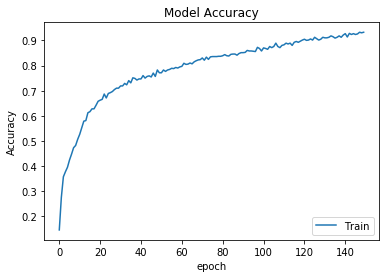

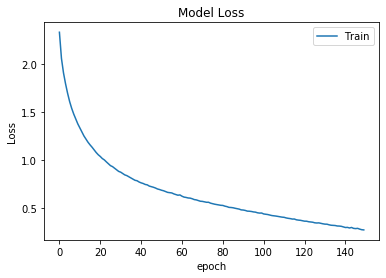

In [88]:
# Data hitory list
print(history.history.keys())
# review history for accuracy
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='lower right')
plt.show()
# review history for loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

# Training the model with k-folds we get only lables with somehat apparent results( in loss and accuracy curves). Because, most of the folds understand better with more training , and more by taking high number of epoches. So lets try using regularization and dropout methods to get the better results . 

In [89]:
from tensorflow.keras import layers

Training on fold 0 ...
Training on fold 1 ...
Training on fold 2 ...
Training on fold 3 ...
Training on fold 4 ...
Training on fold 5 ...
Training on fold 6 ...
Training on fold 7 ...
Training on fold 8 ...
Training on fold 9 ...


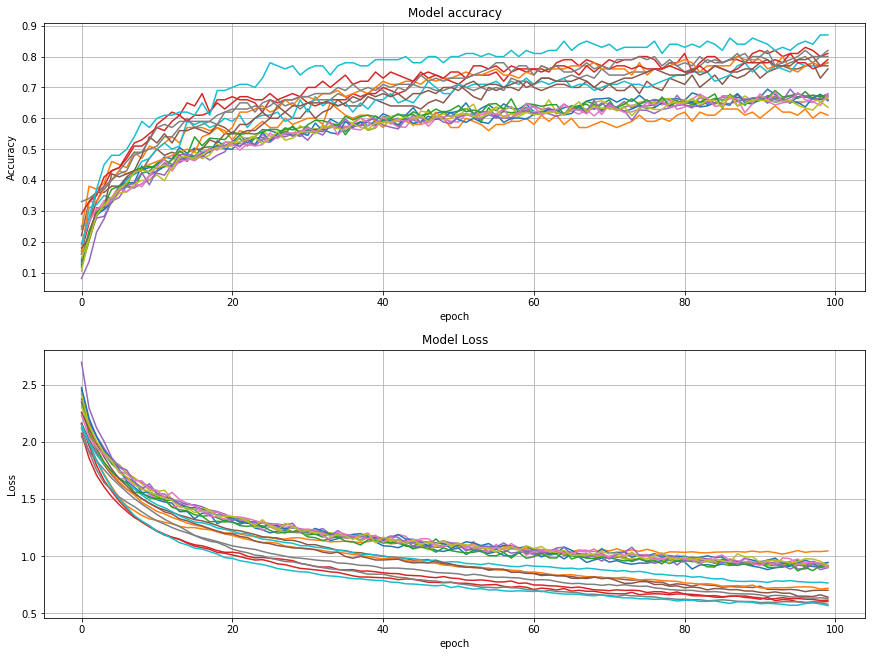

In [90]:
fig, axes = plt.subplots(2,1, figsize=(12,9), constrained_layout=True)

for i, fold_ind in enumerate(file[:]):
    print('Training on fold {} ...'.format(i))
    train_indices, Test_indices = fold_ind[0], fold_ind[1]
    Train_Data = Music_Datafile_nrm_df.iloc[Train_indices]
    Train_Labels = New_Music_Data['genre'].iloc[Train_indices]
    Test_Data = Music_Datafile_nrm_df.iloc[Test_indices]
    Test_Labels = New_Music_Data['genre'].iloc[Test_indices]
    
    Data_Model = keras.Sequential([
        keras.layers.Dense(28, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(19, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10, activation='softmax')
    ])

    Data_Model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = Data_Model.fit(Train_Data.values,
                        Train_Labels.values,
                        epochs=100,
                        batch_size=16,
                        validation_data=(Test_Data.values, Test_Labels.values),
                        verbose=0
                       )
    
    # review history for accuracy
    axes[0].plot(history.history['accuracy'], label='acc_'+str(i))
    axes[0].plot(history.history['val_accuracy'], label='val_acc_'+str(i))

    # review history for loss
    axes[1].plot(history.history['loss'], label='loss_'+str(i))
    axes[1].plot(history.history['val_loss'], label='val_loss_'+str(i))

axes[0].set_title('Model accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('epoch')
axes[0].grid(True, which='Major')
#axes[0].legend(loc='lower right')

axes[1].set_title('Model Loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('epoch')
axes[1].grid(True, which='Major')
#axes[1].legend(loc='upper right')

We understood that training the network for a bit longer, results in better performance while regularizing. By  the graph shown above we can understand that poor generalization happened with  more regularization .So Training  for 100 or more epoches is currently the best format.

In [91]:
## To export this data into tensorboard - %load_ext tensorboard.notebook

In [ ]:
## %tensorboard -- logdir logs can be used to test the scalar accuracy and many more 